In [2]:
# Cell 1: Import Libraries
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [5]:
# Cell 2: Set Parameters and Define Classes
IMG_SIZE = 128
BATCH_SIZE = 32
EPOCHS = 10
DATA_DIR = 'Final_Dataset_LC'  # Change to your data directory
classes = ['lung_aca', 'lung_scc', 'lung_n']


In [6]:
# Cell 3: Load and Preprocess Data
def load_data(data_dir):
    X = []
    Y = []
    for class_name in classes:
        class_dir = os.path.join(data_dir, class_name)
        for image_name in os.listdir(class_dir):
            try:
                image_path = os.path.join(class_dir, image_name)
                img = keras.preprocessing.image.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
                img_array = keras.preprocessing.image.img_to_array(img) / 255.0  # Normalize
                X.append(img_array)
                Y.append(class_name)
            except Exception as e:
                print(f"Error loading image {image_path}: {e}")
    
    return np.array(X), np.array(Y)

X, Y = load_data(DATA_DIR)


In [7]:
# Cell 4: Encode Labels
le = LabelEncoder()
Y_encoded = le.fit_transform(Y)
Y_one_hot = keras.utils.to_categorical(Y_encoded, num_classes=len(classes))


In [8]:
# Cell 5: Split Data into Training and Validation Sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y_one_hot, test_size=0.2, random_state=42)


In [9]:
# Cell 6: Data Augmentation
data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [10]:
# Cell 7: Create CNN Model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(classes), activation='softmax')
])


c:\Users\MY\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Cell 8: Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [16]:
# Cell 9: Callbacks for Training
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)


In [17]:
# Cell 10: Train Model
history = model.fit(data_gen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
                    epochs=EPOCHS,
                    validation_data=(X_val, Y_val),
                    callbacks=[early_stopping, reduce_lr])


Epoch 1/10


c:\Users\MY\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 245ms/step - accuracy: 0.5471 - loss: 0.8812 - val_accuracy: 0.8167 - val_loss: 0.4396 - learning_rate: 0.0010
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 241ms/step - accuracy: 0.7928 - loss: 0.4426 - val_accuracy: 0.8167 - val_loss: 0.3839 - learning_rate: 0.0010
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 255ms/step - accuracy: 0.8131 - loss: 0.4094 - val_accuracy: 0.8500 - val_loss: 0.3368 - learning_rate: 0.0010
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 266ms/step - accuracy: 0.8411 - loss: 0.3770 - val_accuracy: 0.8767 - val_loss: 0.3126 - learning_rate: 0.0010
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 271ms/step - accuracy: 0.8562 - loss: 0.3269 - val_accuracy: 0.8733 - val_loss: 0.2938 - learning_rate: 0.0010
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 274ms/step - accuracy: 0.8686 - loss: 0.3376 - val_accuracy: 0.9000 - val_loss: 0.2488 - learning_rate: 0.0010
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 272ms/step - accuracy: 0.8688 - loss: 0.3112 - val_

In [18]:
# Cell 11: Evaluate Model
loss, accuracy = model.evaluate(X_val, Y_val)
print(f'Validation loss: {loss:.4f}')
print(f'Classification accuracy on validation data: {accuracy:.4f}')


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8898 - loss: 0.3007
Validation loss: 0.2430
Classification accuracy on validation data: 0.9067


In [19]:
# Cell 12: Classification Report
predictions = model.predict(X_val)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Y_val, axis=1)

print(classification_report(true_classes, predicted_classes, target_names=le.classes_))


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
              precision    recall  f1-score   support

    lung_aca       0.89      0.84      0.86       104
      lung_n       0.99      0.95      0.97       110
    lung_scc       0.84      0.94      0.89        86

    accuracy                           0.91       300
   macro avg       0.90      0.91      0.90       300
weighted avg       0.91      0.91      0.91       300



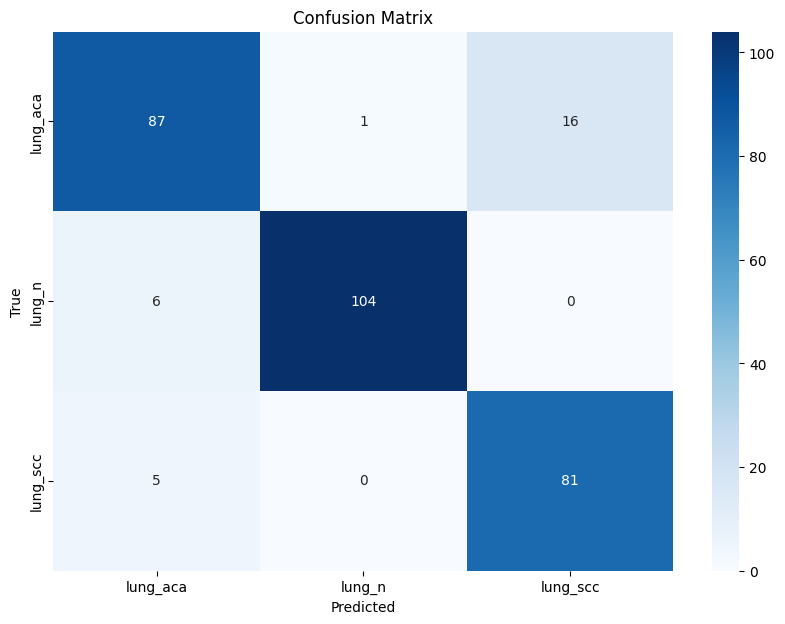

In [20]:
# Cell 13: Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [22]:
# Cell 14: Save Model
model.save('CnnModel.h5')
print("Model saved to 'Lung_Cancer_CNN_model.h5'")


Model saved to 'Lung_Cancer_CNN_model.h5'
